### 문제정의
- 사내식당의 재고율을 낮추자!
- 메뉴에 따른 식당 이용률 확인 -> 메뉴의 퀄리티 상승
- 식수예측과 관련된 정보를 지속적으로 확인하고 개선하여 영양소 고려 및 직원선호도 파악 후 적절한 식단 구성

In [9]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns

# warnings 제거
import warnings
warnings.filterwarnings('ignore')

In [10]:
# 데이터 불러오기
data = pd.read_csv('data/Cafeteria.csv', encoding='cp949')
data

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0
1201,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0
1203,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0


- 데이터 정보
| 컬럼명                    | 설명                                     |
|--------------------------|----------------------------------------|
| 일자                     | 데이터가 수집된 날짜                    |
| 요일                     | 해당 날짜의 요일                        |
| 본사정원수               | 본사에 근무하는 전체 직원 수             |
| 본사휴가자수             | 본사에 휴가 중인 직원 수                |
| 본사출장자수             | 본사에 출장 중인 직원 수                |
| 본사시간외근무명령서승인건수 | 본사에서 승인된 시간 외 근무 명령서 건수  |
| 현본사소속재택근무자수   | 본사 소속 중 재택 근무 중인 직원 수     |
| 조식메뉴                 | 해당 날짜의 조식 메뉴                   |
| 중식메뉴                 | 해당 날짜의 중식 메뉴                   |
| 석식메뉴                 | 해당 날짜의 석식 메뉴                   |
| 중식계                   | 해당 날짜에 중식을 이용한 직원 수       |
| 석식계                   | 해당 날짜에 석식을 이용한 직원 수       |

In [11]:
# 데이터 정보 확인
data.info()
# 일자, 요일, 메뉴 -> 문자열, 나머지는 숫자형태의 데이터인것을 확인
# 결측치는 없음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [12]:
# 일자 데이터는 '시간' 정보를 담고 있기 때문에 문자열이 아닌 날짜형태로 변경
data.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0


In [14]:
import datetime
# 날짜와 시간을 연산, 비교할 수 있도록 변경해주는 라이브러리
data['일자'] = pd.to_datetime(data['일자'])
data['일자']

0      2016-02-01
1      2016-02-02
2      2016-02-03
3      2016-02-04
4      2016-02-05
          ...    
1200   2021-01-20
1201   2021-01-21
1202   2021-01-22
1203   2021-01-25
1204   2021-01-26
Name: 일자, Length: 1205, dtype: datetime64[ns]

In [15]:
# 날짜 기간 확인 -> max(), min()
data['일자'].max(),data['일자'].min()

(Timestamp('2021-01-26 00:00:00'), Timestamp('2016-02-01 00:00:00'))

In [24]:
# 요일별 평균 식수 확인 (중식계, 석식계)
# groupby

df_day = data.groupby('요일')[['중식계','석식계']].mean()
df_day

,중식계,석식계
요일,,
금,653.609959,404.979253
목,823.991803,480.401639
수,905.213389,363.615063
월,1144.331950,538.933610
화,925.620833,520.129167


In [29]:
# For 그래프 출력, 요일별 인덱싱
# 월, 화, 수, 목, 금 기준으로 인덱싱
df_day= df_day.loc[['월','화','수','목','금']]
df_day

,중식계,석식계
요일,,
월,1144.331950,538.933610
화,925.620833,520.129167
수,905.213389,363.615063
목,823.991803,480.401639
금,653.609959,404.979253


(600.0, 1200.0)

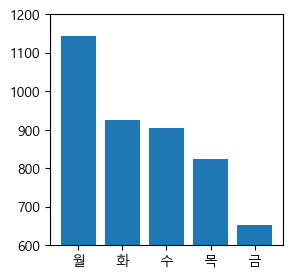

In [32]:
# 그래프 라이브러리
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic' # 한글인코딩
plt.figure(figsize=(3,3))
# plt.bar(x축/요일, y축/중식계식수)
plt.bar(df_day.index, df_day['중식계'])
plt.ylim(600,1200)

# 월요일에 중식계에 대한 식수가 가장 많음
# 금요일에는 중식계에 대한 식수가 가장 낮음
# 주초에는 식당이용률이 높고 금요일에는 외부식사 (휴가와 관련)

<BarContainer object of 5 artists>

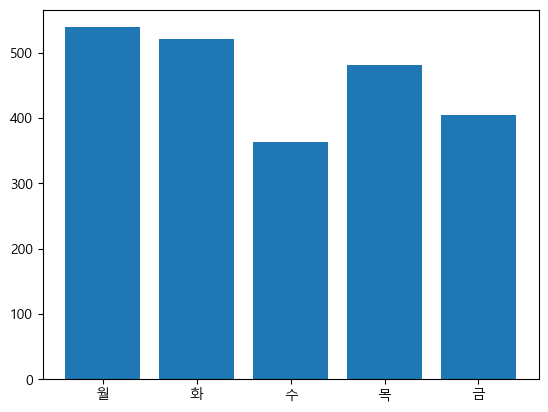

In [33]:
# 석식계의 요일별 평균 식수 그래프로 확인
plt.bar(df_day.index,df_day['석식계'])

In [36]:
# 월별 평균 중식계, 석식계 데이터 확인
# month 새로운 컬럼 생성
data.head()
data['month'] = data['일자'].dt.month

In [37]:
data.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,month
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2


In [46]:
# 월별 평균 중식계, 석식계 확인을 위한 DataFrame 생성

df_month = data.groupby('month')[['중식계','석식계']].mean()
df_month

,중식계,석식계
month,,
1,934.247525,424.564356
2,989.623656,514.860215
3,953.607477,530.700935
4,883.621359,480.825243
5,869.787879,458.131313
6,863.311111,460.355556
7,848.736364,437.300000
8,854.785047,459.485981
9,907.148936,463.617021


(800.0, 1000.0)

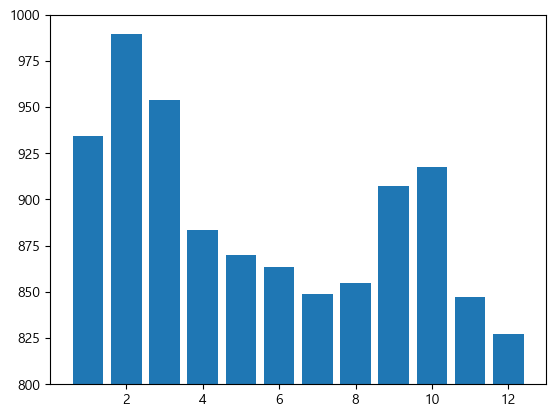

In [53]:
# 월별 평균 중식계 식수 그래프

# plt.bar(x축/요일, y축/중식계식수)
plt.bar(df_month.index, df_month['중식계'])
plt.ylim(800,1000)

In [54]:
# 메뉴데이터를 활용해보자!
# text 형태의 데이터임 -> 전처리
data['조식메뉴'][0]

0       모닝롤/찐빵  우유/두유/주스 계란후라이  호두죽/쌀밥 (쌀:국내산) 된장찌개  쥐...
1       모닝롤/단호박샌드  우유/두유/주스 계란후라이  팥죽/쌀밥 (쌀:국내산) 호박젓국찌...
2       모닝롤/베이글  우유/두유/주스 계란후라이  표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...
3       모닝롤/토마토샌드  우유/두유/주스 계란후라이  닭죽/쌀밥 (쌀,닭:국내산) 근대국...
4       모닝롤/와플  우유/두유/주스 계란후라이  쇠고기죽/쌀밥 (쌀:국내산) 재첩국  방...
                              ...                        
1200    모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...
1201    모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...
1202    모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...
1203    모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...
1204    모닝롤/야채샌드 우유/주스 계란후라이/찐계란 참치죽/흑미밥 홍합탕 애호박새우젓볶음 ...
Name: 조식메뉴, Length: 1205, dtype: object

In [55]:
data['조식메뉴'][0].split(' ')
# 공백으로 나누어져있는 메뉴를 분리 -> 2칸과 1칸으로 비균일하게 나누어져있음을 확인
# 2칸 공백을 1칸 공백으로 변경

['모닝롤/찐빵',
 '',
 '우유/두유/주스',
 '계란후라이',
 '',
 '호두죽/쌀밥',
 '(쌀:국내산)',
 '된장찌개',
 '',
 '쥐어채무침',
 '',
 '포기김치',
 '(배추,고추가루:국내산)',
 '']

In [56]:
# 2칸 공백 -> 1칸 공백 
data['조식메뉴'] = data['조식메뉴'][0].replace('  ',' ')

'모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐어채무침 포기김치 (배추,고추가루:국내산) '

In [60]:
# 2칸공백 -> 1칸공백 변경작업을 모든 메뉴에 적용
data['조식메뉴'] = data['조식메뉴'].str.replace('  ', ' ')
data['중식메뉴'] = data['중식메뉴'].str.replace('  ', ' ')
data['석식메뉴'] = data['석식메뉴'].str.replace('  ', ' ')

In [61]:
# 1칸 공백을 기준으로 데이터 나눠주기
data['조식메뉴'][0].split(' ')

['모닝롤/찐빵',
 '우유/두유/주스',
 '계란후라이',
 '호두죽/쌀밥',
 '(쌀:국내산)',
 '된장찌개',
 '쥐어채무침',
 '포기김치',
 '(배추,고추가루:국내산)',
 '']

In [63]:
# 전체 조식메뉴 데이터 나눠주려고 str 넣었음.
data['조식메뉴']=data['조식메뉴'].str.split(' ')
data['중식메뉴']=data['중식메뉴'].str.split(' ')
data['석식메뉴']=data['석식메뉴'].str.split(' ')

In [64]:
data['중식메뉴']

0       [쌀밥/잡곡밥, (쌀,현미흑미:국내산), 오징어찌개, 쇠불고기, (쇠고기:호주산),...
1       [쌀밥/잡곡밥, (쌀,현미흑미:국내산), 김치찌개, 가자미튀김, 모둠소세지구이, 마...
2       [카레덮밥, (쌀,현미흑미:국내산), 팽이장국, 치킨핑거, (닭고기:국내산), 쫄면...
3       [쌀밥/잡곡밥, (쌀,현미흑미:국내산), 쇠고기무국, 주꾸미볶음, 부추전, 시금치나...
4       [쌀밥/잡곡밥, (쌀,현미흑미:국내산), 떡국, 돈육씨앗강정, (돼지고기:국내산),...
                              ...                        
1200    [쌀밥/흑미밥/찰현미밥, 아욱국, 수제함박스테이크, 견과류마카로니범벅, 생깻잎지, ...
1201    [쌀밥/수수밥/찰현미밥, 냉이된장국, 동파육, 봄동전, 청경채/버섯숙회*초장, 무생...
1202    [전주비빔밥*약고추장, 계란파국, 요거닭, 올방개묵무침, 파프리카해초무침, 포기김치...
1203    [쌀밥/흑미밥/찰현미밥, 전주식콩나물해장국, 돈육간장불고기, 깐풍연근, 연두부*달래...
1204    [쌀밥/귀리밥/찰현미밥, 들깨미역국, 교촌간장치킨, 옥수수콘치즈구이, 가지고추장무침...
Name: 중식메뉴, Length: 1205, dtype: object

In [65]:
data.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,month
0,2016-02-01,월,2601,50,150,238,0.0,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, (쌀:국내산), 된장찌...","[쌀밥/잡곡밥, (쌀,현미흑미:국내산), 오징어찌개, 쇠불고기, (쇠고기:호주산),...","[쌀밥/잡곡밥, (쌀,현미흑미:국내산), 육개장, 자반고등어구이, 두부조림, 건파래...",1039.0,331.0,2
1,2016-02-02,화,2601,50,173,319,0.0,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, (쌀:국내산), 호...","[쌀밥/잡곡밥, (쌀,현미흑미:국내산), 김치찌개, 가자미튀김, 모둠소세지구이, 마...","[콩나물밥*양념장, (쌀,현미흑미:국내산), 어묵국, 유산슬, (쇠고기:호주산), ...",867.0,560.0,2
2,2016-02-03,수,2601,56,180,111,0.0,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, (쌀:국내산), ...","[카레덮밥, (쌀,현미흑미:국내산), 팽이장국, 치킨핑거, (닭고기:국내산), 쫄면...","[쌀밥/잡곡밥, (쌀,현미흑미:국내산), 청국장찌개, 황태양념구이, (황태:러시아산...",1017.0,573.0,2


In [66]:
data['조식메뉴']

0       [모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, (쌀:국내산), 된장찌...
1       [모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, (쌀:국내산), 호...
2       [모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, (쌀:국내산), ...
3       [모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, (쌀,닭:국내산),...
4       [모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, (쌀:국내산), 재첩...
                              ...                        
1200    [모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...
1201    [모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...
1202    [모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...
1203    [모닝롤/호박고구마오븐구이, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 감자...
1204    [모닝롤/야채샌드, 우유/주스, 계란후라이/찐계란, 참치죽/흑미밥, 홍합탕, 애호박...
Name: 조식메뉴, Length: 1205, dtype: object

##### 공백을 기준으로 나눈 데이터 중 TF-IDF 방식을 활용하여 main 메뉴 선정
- 공백을 기준으로 메뉴들을 나눴을 때 방문 혼잡도에 영향을 많이 미치는 메뉴는 메인메뉴
- 매일 나오는 메뉴가 아닌 어쩌다 한번 나오는 메뉴가 메인메뉴이기 때문에 TF-IDF 방식을 활용
- 추가로 메인메뉴를 선정하기 위한 불필요한 정보인 원산지 정보 제거하고 진행

In [ ]:
# 리스트 형태의 데이터를 문자열로 변경해주는 작업 진행>> 내일부터!!

In [69]:
# 정규표현식 : 문자열 검색, 패턴 찾아주는데 사용
import re

# 불필요한 원산지 정보 제거
# 제거 함수 정의 -> 적용
def remove (text):
    # 문자열에서 소괄호 안에 있는 텍스트는 제거
    return re.sub(r'\([^)]*\)','',text)
#[^)]* : list 안에 닫는 괄호를 제외한 ㄴ^) 모든 문자를 닫는 괄호가 나타나기 전까지 찾아주세요

In [71]:
# 데이터 프레임에 적용하기~
data['조식메뉴_정제'] = data['조식메뉴'].apply(remove)

TypeError: expected string or bytes-like object, got 'list'